<a href="https://colab.research.google.com/github/dojun43/Project/blob/main/02.%20%ED%83%9C%EC%96%91%EA%B4%91%20%EB%B0%9C%EC%A0%84%EB%9F%89%20%EC%98%88%EC%B8%A1%20AI%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%ED%83%9C%EC%96%91%EA%B4%91_%EB%B0%9C%EC%A0%84%EB%9F%89_210513.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/프로젝트/태양광 발전량/train.csv')
train.head

<bound method NDFrame.head of         Day  Hour  Minute  DHI  DNI   WS     RH   T  TARGET
0         0     0       0    0    0  1.5  69.08 -12     0.0
1         0     0      30    0    0  1.5  69.06 -12     0.0
2         0     1       0    0    0  1.6  71.78 -12     0.0
3         0     1      30    0    0  1.6  71.75 -12     0.0
4         0     2       0    0    0  1.6  75.20 -12     0.0
...     ...   ...     ...  ...  ...  ...    ...  ..     ...
52555  1094    21      30    0    0  2.4  70.70  -4     0.0
52556  1094    22       0    0    0  2.4  66.79  -4     0.0
52557  1094    22      30    0    0  2.2  66.78  -4     0.0
52558  1094    23       0    0    0  2.1  67.72  -4     0.0
52559  1094    23      30    0    0  2.1  67.70  -4     0.0

[52560 rows x 9 columns]>

In [ ]:
#데이터에서 DHI만 추출 
DHI = train.filter(['DHI']).values

#0과 1사이 값으로 변환 
scalar = MinMaxScaler(feature_range = (0,1))
scaled_DHI = scalar.fit_transform(DHI)

In [ ]:
#전처리
x_train = [] 
y_train = [] 
x_test = [] 
y_test = [] 
past_set = 96

training_data_len = math.ceil(len(scaled_DHI) * 0.66)
DHI_train_data = scaled_DHI[0:training_data_len]
DHI_test_data = scaled_DHI[training_data_len - past_set:, :]

for i in range(past_set, len(DHI_train_data)):
    x_train.append(DHI_train_data[i- past_set:i,0])
    y_train.append(DHI_train_data[i,0])

for i in range(past_set,len(DHI_test_data)):
  x_test.append(DHI_test_data[i-past_set:i, 0])
  y_test.append(DHI_test_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train_shape:',y_train_shape)
print('x_test:',x_test_shape, 'y_test_shape:',y_test_shape)

x_train: (34594, 96, 1) y_train_shape: (34594,)
x_test: (17870, 96, 1) y_test_shape: (17870,)


In [ ]:
#모델 생성
model = Sequential()
model.add(LSTM(250,return_sequences =True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(250,return_sequences =False))
model.add(Dense(50))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#학습
model.fit(x_train, y_train, batch_size = 500, epochs = 16)

Epoch 1/16
 4/70 [>.............................] - ETA: 5:48 - loss: 0.0374

KeyboardInterrupt: ignored

In [ ]:
#예측 
predictions = model.predict(x_test)

predictions = scalar.inverse_transform(predictions)

In [ ]:
#예측값과 실제 값 오차
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

63.35527684288854

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


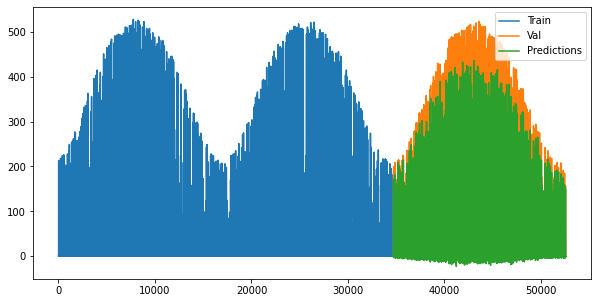

In [ ]:
#시각화
data = train.filter(['DHI'])

DHI_train = data[:training_data_len]
DHI_valid = data[training_data_len:]
DHI_valid['Predictions'] = predictions 

plt.figure(figsize=(10,5))
plt.plot(DHI_train['DHI'])
plt.plot(DHI_valid[['DHI', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'low')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


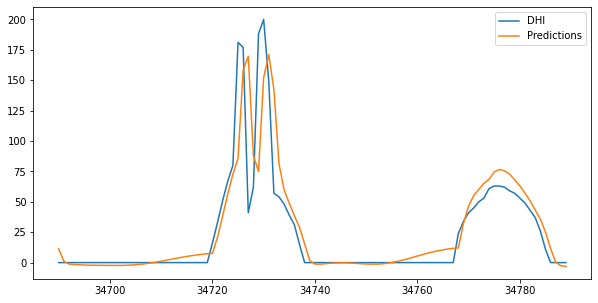

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(DHI_valid[['DHI', 'Predictions']][:100] )
plt.legend(['DHI', 'Predictions'], loc = 'low')